La distribución de Fisher-Tippett o Distribución del Valor Extremo Generalizada (GEV) viene dada por: 
$
\frac{1}{\sigma}t(x)^{\xi+1}e^{-t(x)}
$

donde si $\xi =0$ tenemos $t(x)=e^{-\frac{x-\mu}{\sigma}}$. Para este trabajo utilizaremos $\mu=0$ y $\lambda=\frac{1}{\sigma}=1$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Definiremos primero la función t(x) para poder tenerla a mano.

def t(x, l=1):
    t=np.exp(-l*x)
    return t

In [4]:
#luego, la distribución

def pdf(x, l=1):
    pdf = l*t(x)*np.exp(-t(x))
    return pdf

Ahora, la distribución acumulada viene dada por la integral:
$
\int_{-\infty}^{x} t(x') \cdot \exp(-t(x')) \, dx' = \exp(-t(x))
$

In [5]:
def cdf(x):
    cdf =np.exp(-t(x))
    return cdf

Luego, la inversa:
$
y=\exp(-t(x)) \leftrightarrow -\ln(y)=t(x) \leftrightarrow \ln(\frac{1}{y}) = \exp(-x) \leftrightarrow x = -\ln(\ln(\frac{1}{y}))
$


In [6]:
def inversa(y):
    x = -np.log(-np.log(y))
    return x

Luego, generamos una distribución uniforme de números pseudo-aleatorios con Numpy, para luego pasarlos por la inversa. Con esto obtenemos un conjunto de valores x que siguen la distribución deseada.

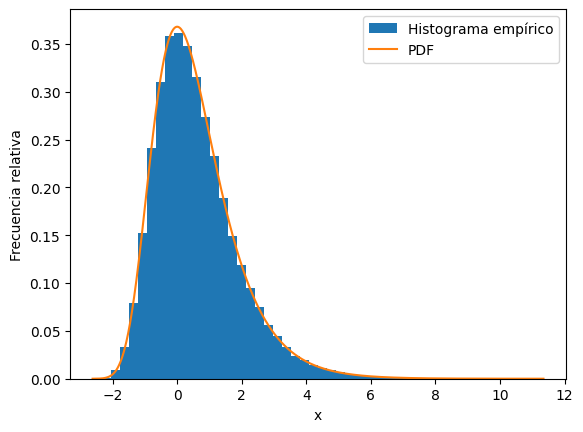

In [7]:
y = np.random.uniform(0,1,100000)
x = inversa(y)
z=np.linspace(min(x),max(x),1000)
plt.hist(x, bins=50, density=True, label='Histograma empírico')
plt.plot(z, pdf(z), label='PDF')
plt.legend()
plt.xlabel('x')
plt.ylabel('Frecuencia relativa')
plt.show()

Luego, la media teórica será:

$
x_{1} = \int_{0}^{1} x t(x) \cdot \exp(-t(x)) \, dx = \frac{0.57721}{\lambda} = 0.57721
$

Por otra parte, estimamos la media de nuestra distribución fabricada con datos pseudo-aleatorios:

In [8]:
xmed = np.mean(x)
print(xmed)

0.5793510256369162
